## Comparison of K-Means and Hierachrical Clustering

Based on mall customer data we will cluster groups of people into different segments using two approaches and compare the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import Data Set
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
sex = pd.get_dummies(dataset['Genre'],drop_first=True)
dataset.drop(['Genre'],axis=1,inplace=True)
dataset=pd.concat([dataset,sex],axis=1)

In [5]:
dataset.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


# Exploritory Data Visualization and Analysis

In [6]:
sns.set_style('whitegrid')

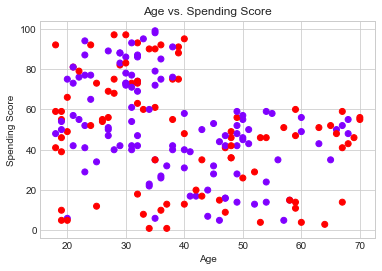

In [7]:
plt.scatter(dataset['Age'],dataset['Spending Score (1-100)']
            ,c=dataset['Male'],cmap='rainbow')
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

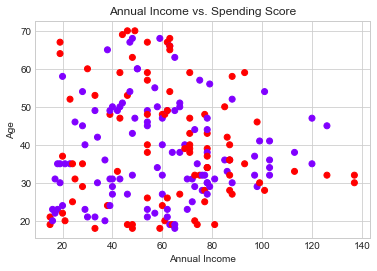

In [8]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Age']
            ,c=dataset['Male'],cmap='rainbow')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.show()

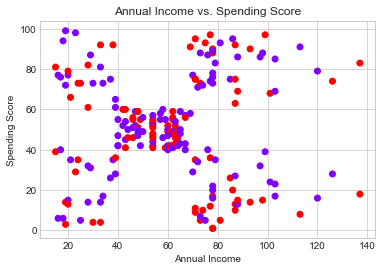

In [9]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)']
            ,c=dataset['Male'],cmap='rainbow')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Hierarchical Clustering

In [10]:
income=dataset['Annual Income (k$)']
score=dataset['Spending Score (1-100)']
X=dataset=pd.concat([income,score],axis=1)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
sns.set_style('white')

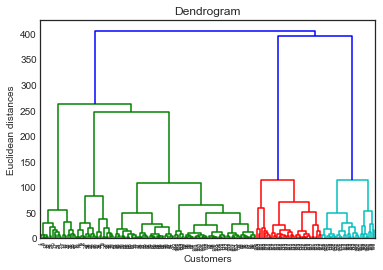

In [12]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset)

In [15]:
hc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int64)

# K Means Clustering 
Performed on the same Data Set

In [16]:
from sklearn.cluster import KMeans

In [17]:
sns.set_style('whitegrid')

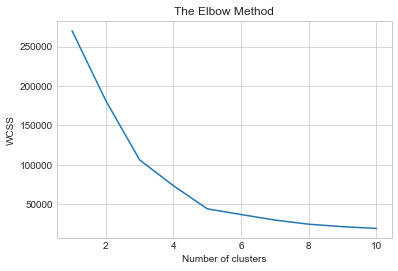

In [18]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(dataset)

In [20]:
kmeans.cluster_centers_

array([[ 86.53846154,  82.12820513],
       [ 25.72727273,  79.36363636],
       [ 55.2962963 ,  49.51851852],
       [ 88.2       ,  17.11428571],
       [ 26.30434783,  20.91304348]])

In [21]:
kmeans.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0])

# Comparison of Results

Text(0,0.5,'Spending Score (1-100)')

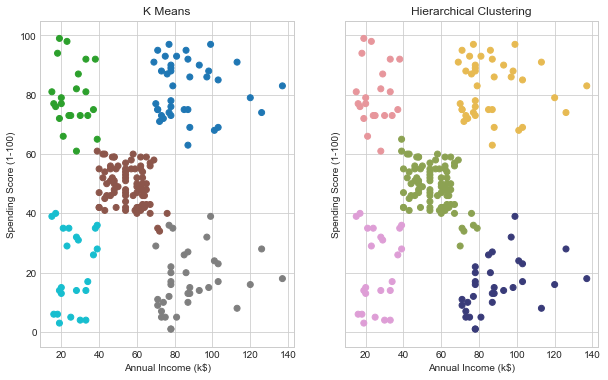

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'],
            c=kmeans.labels_,cmap='tab10')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')

ax2.set_title("Hierarchical Clustering")
ax2.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'],
            c=hc.labels_,cmap='tab20b')
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Spending Score (1-100)')

# Conclusion

Both the dendrogram and elbow method show 5 optimal clusters and produced similar results.  

In Hierarchical Clustering: The optimal number of clusters can be obtained by the model itself, practical visualisation with the dendrogram; however it is not appropriate for large datasets.

K-Means Clustering: Simple to understand, easily adaptable, works well on small or large datasets, fast, and efficient; however choosing the correct number of clusters is more subjective.